In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

from scipy.stats import zscore
from scipy import stats
from scipy.spatial.distance import cdist, pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster

#import sklearn.metrics
# from sklearn.model_selection  import train_test_split

In [2]:
df = pd.read_excel("Credit Card Customer Data.xlsx")

## Based on above graphs we can say 
1. Avg_Credit_Limit
2. Total_visits_online both are right skewed. There are outliers in both of them.
3. There are no null values.
4. Rest of the data looks fine.
5. Even after using Z score outliers stayed. So we need to fix the outliers.
6. Avg_Credit_Limit got 39 outliers. Inreal life this is possible as very selected few customers only will have high credi limit.
7. Total_visits_online has 37outliers. 
8. If you lookat my output on cell 16, 24 outliers are matching in both columns.
9. Data also doesn't contain "?" .

#                                            Analysis
###   We have data related to customers of a bank. There are five features (columns) we use for this.
####  The columns :
####             Avg_Credit_Limit
####             Total_Credit_Cards
####             Total_visits_bank
####             Total_visits_online
####             Total_calls_made

####    Total records : 660. Small set. This shows hierarchical clustering should work better than KMeans.

#### 1.	Conducted univariate analysis and provided the comments in the note book.
#### 2.	There were outliers in Avg_Credit_Limit (39) and Total_visits_online(37)
#### 3.	If we look at the distribution plots of individual variables, we can see 4 or 2 clusters. Also, the above two 
####     columns are skewed to right.
#### 4.	Also, there is no co-relation between any two variables(columns or features).
#### 5.	Tried clustering after fixing the outliers and without fixing them.
#### 6.	First listed results after fixing outliers.
#### 7.	Second listed results without removing outliers and as the scores are better for this, did cluster analysis 
####     and recommendations for both hierarchical complete linkage and KMeans clustering.


# Analysis after fixing outliers ===========================>

### KMeans Clustering

#### Ran KMeans with 4, 3 clusters as per the elbow method we got 4.
#### Got a score of 50 with three clusters.
#### The box plots below. Mostly there is no overlap between clusters. 
#### But we have few elements in group 1 for Avg_Credit_Limit and Total_vi sits_online

#### Elbow method graph.


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

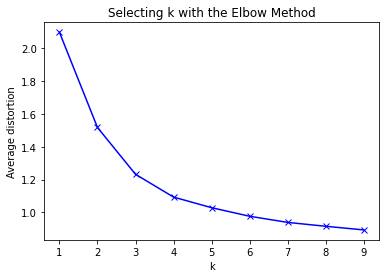

In [67]:
#Finding optimal no. of clusters

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df3)
    prediction=model.predict(df3)
    meanDistortions.append(sum(np.min(cdist(df3, model.cluster_centers_, 'euclidean'), axis=1)) / df3.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

## KMeans clusteringwith 3 clusters -->

In [ ]:
# Let us try with K = 3
df3 = df3_z_gold.copy()
final_model=KMeans(3)
final_model.fit(df3)
prediction=final_model.predict(df3)

#Append the prediction 
df2["GROUP"] = prediction
df3["GROUP"] = prediction
print("Groups Assigned : \n")
df3.head()

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021635A864C8>,
      dtype=object)

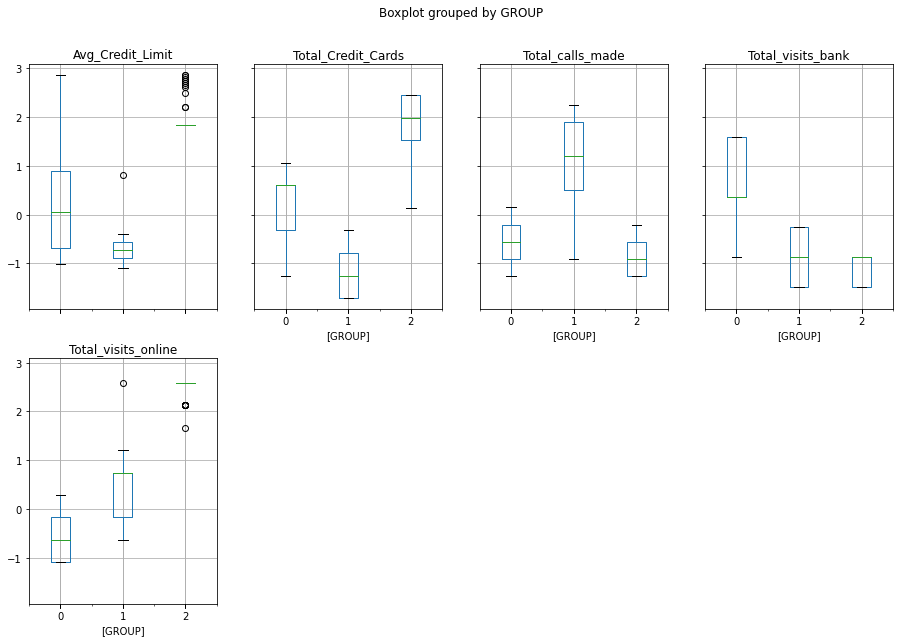

In [83]:
df3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [95]:

silhouette_score(df_labeled.drop('labels',axis=1),df_labeled['labels'] )   # We got a score of 50 with three clusters which is
# better than the previous 39.

0.5047881723333618

In [96]:
# As per the elbow curve, 4 seems to be the resonable clusters.
# When you look at box plot with clusters = 4. We do see little ovelap of Total_Credit_Cards, Total_Calls_made.
# If we look at clusters = 3 , not that much overlap.
# But the elbo plot, labels and box plots put together 4 seems to be reasonable.
# But if we lookat the silhoutte score 3 clusters got a better value.
# So finally 3 clusters seems to be GOOD.

#### Clusters are not ovelapping and distribution seems to be fine.

## Hierachical clustering -->

## Did hierarchical clustering by using the following linkages. Ward, Complete, Average, Shortest,

#### Use ward as linkage metric and distance as Eucledian

### Dendogram

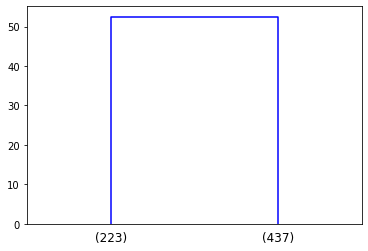

In [101]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

In [103]:
# Calculate Silhoutte Score for Ward linkage
silhouette_score(df3,clusters)

0.4176330137256762

In [104]:
df_clusters = pd.DataFrame(data = clusters, columns= ['GROUP'])
df_clusters 
# df_labels.join(df3.iloc[:,0:5])
df4 = df3.join(df_clusters)

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021636DF40C8>,
      dtype=object)

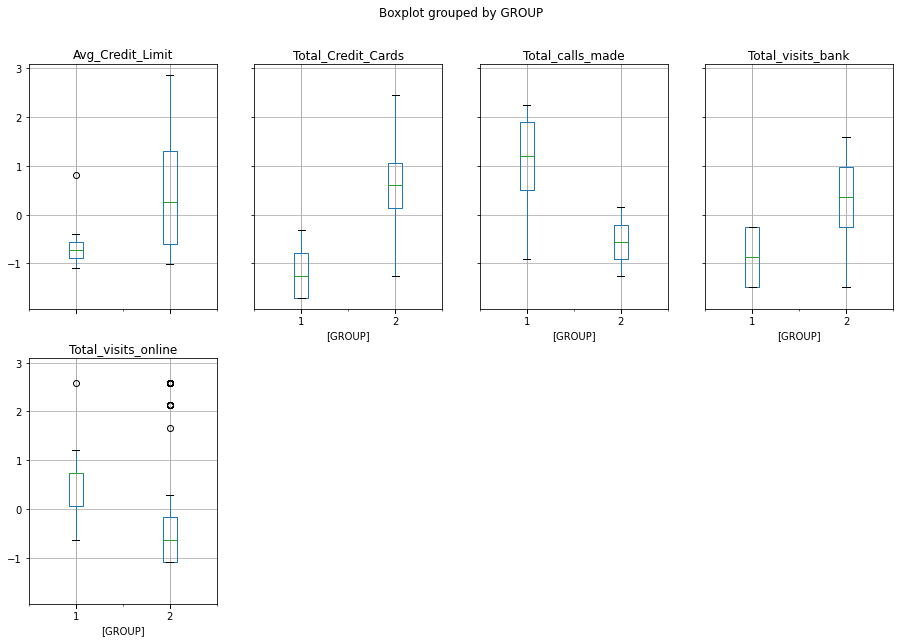

In [105]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [106]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df3, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df3))

c

0.7668112424099262

#### Clusters are not ovelapping and distribution seems to be fine. 

### Use average as linkage metric and distance as Eucledian

#### Did with three clusters. Got score 36 and one cluster zero rows. So changed to 2.

In [112]:
# Calculate Avg Silhoutte Score
silhouette_score(df3,L)

0.47280579123109273

In [113]:
Z = linkage(df3, 'average', metric='euclidean')

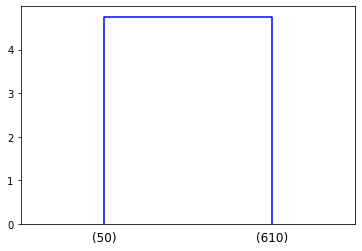

In [114]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216373DFE48>,
      dtype=object)

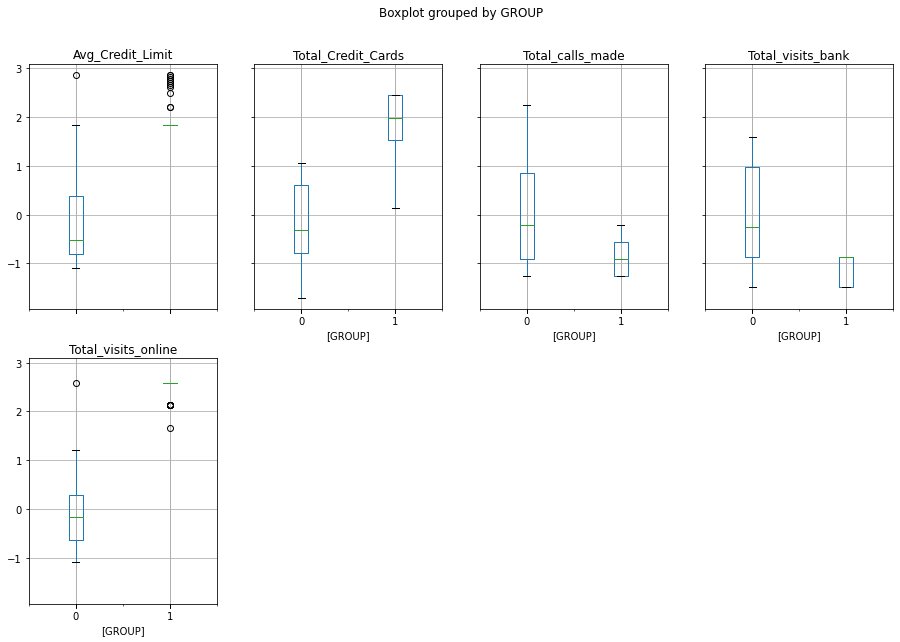

In [117]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [118]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df3, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df3))

c

0.8738818374092228

#### Clusters are not ovelapping and distribution seems to be fine. The cophenet is highest in my entire analysis .87, which is close to 1.

#### Use complete as linkage metric and distance as Eucledian

In [122]:
# Calculate Avg Silhoutte Score
silhouette_score(df3,L)

0.5036210021628501

In [123]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df3, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df3))

c

0.8482180751274768

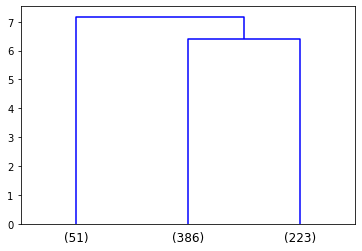

In [125]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021638175E48>,
      dtype=object)

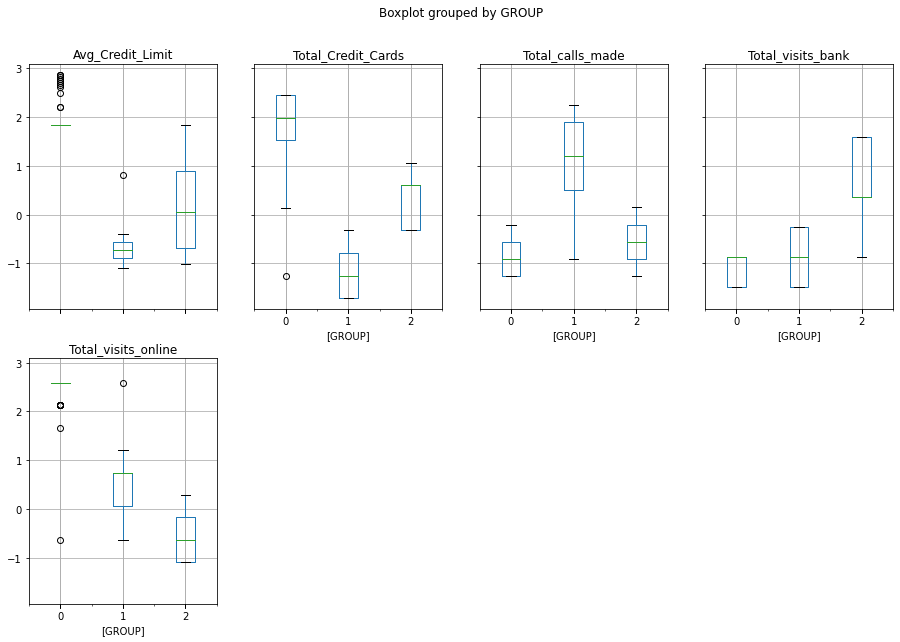

In [128]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#### Mostly there is no overlap between clusters. But we have few elements in group 0 for Avg_Credit_Limit and Total_vi sits_online


#### Use shortest as linkage metric and distance as Eucledian

In [129]:
## Tried 3 clusters. it gave me one row in a cluster. the silhotte came aroung 31. Changed to two clusters 
## then the score went to 47.

In [132]:
# Calculate Avg Silhoutte Score
silhouette_score(df3,L)

0.47280579123109273

In [133]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df3, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(df3))

c

0.6042365834224761

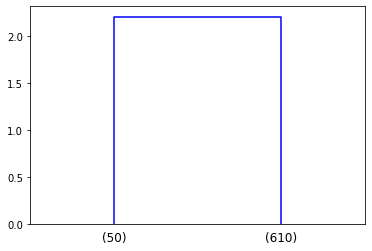

In [135]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

In [137]:
df_clusters = pd.DataFrame(data = L , columns= ['GROUP'])
df_clusters 
df4 = df3.join(df_clusters)

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216382B9548>,
      dtype=object)

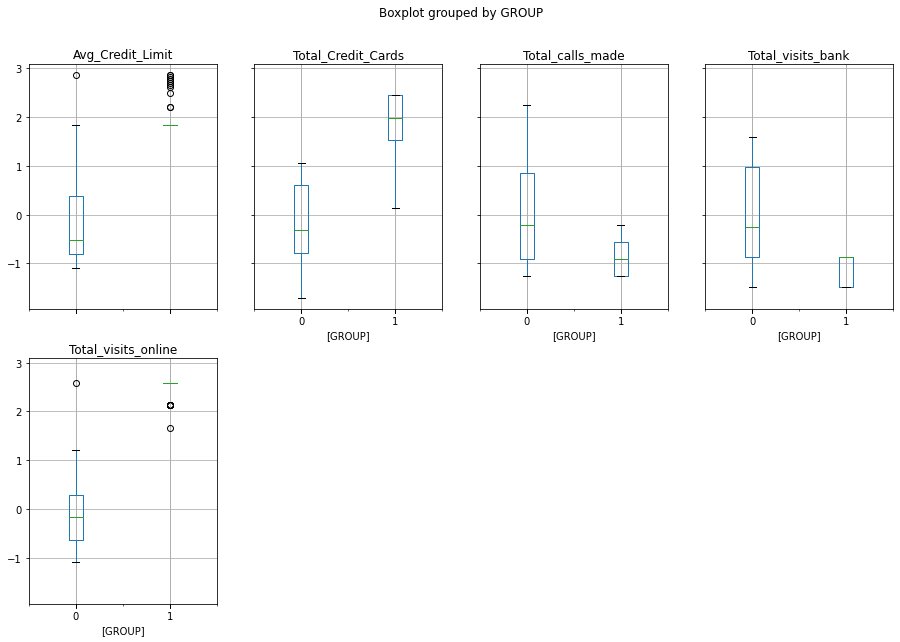

In [138]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

###### Mostly there is no overlap between clusters. But we have few elements in group 1 for Avg_Credit_Limit and Total_vi sits_online


### So far we did analysis after fixing outliers, results were not that great. So started afresh and did analysis without fixing outliers and got better results. So this is what is used as final analysis.
### This is what is used in comparison of clusters between KMean and Hiearchical.
### Also this is what is used for comparing clusters among themselves.
### This is what is used creating recommendations for the bank.
### Please note I provided comments here. Did analysis here and also created a separate word document for analysis.
### I didn't add 25%, 50% etc., results from here in the analysis as they are self-explanatory.
### So this one, with the document together work as a complete solution.

## Data set used as it is without modifying outliers as we got better scores for both Hierarchical and KMeans.

# Trying Hierarchical clustering with Complete Linkage without modifying outliers.

In [140]:
## Let's try not modifying the outliers and see if we can get better results.
## Deleting is not good as the best customers(avg_vredit_limit pretty high will go away)
## Also we have only 660 records.
## Tried fixing outliers and didn't get any good results.
## So trying without fixing outliers......

# df_del.drop(df_del[df_del['Avg_Credit_Limit'] > 100000].index, inplace = True)
# df_del[df_del['Avg_Credit_Limit'] > 100000].count()

In [145]:
df_z_cp = df_z.copy()

In [146]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='complete') # With three got scrore of 50. 
#  so going with 2 clusters,

In [147]:
model.fit(df_z_cp)

AgglomerativeClustering(linkage='complete')

In [149]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(df3, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_z_cp))

c

0.8061661359199105

In [150]:
# Calculate Avg Silhoutte Score
silhouette_score(df_z_cp,L)

0.5703183487340514

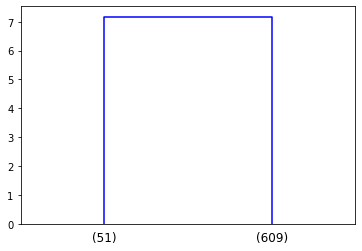

In [151]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

In [152]:
df_clusters = pd.DataFrame(data = L , columns= ['GROUP'])
df_clusters 
df4 = df_z_cp.join(df_clusters)

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002163AB9EF88>,
      dtype=object)

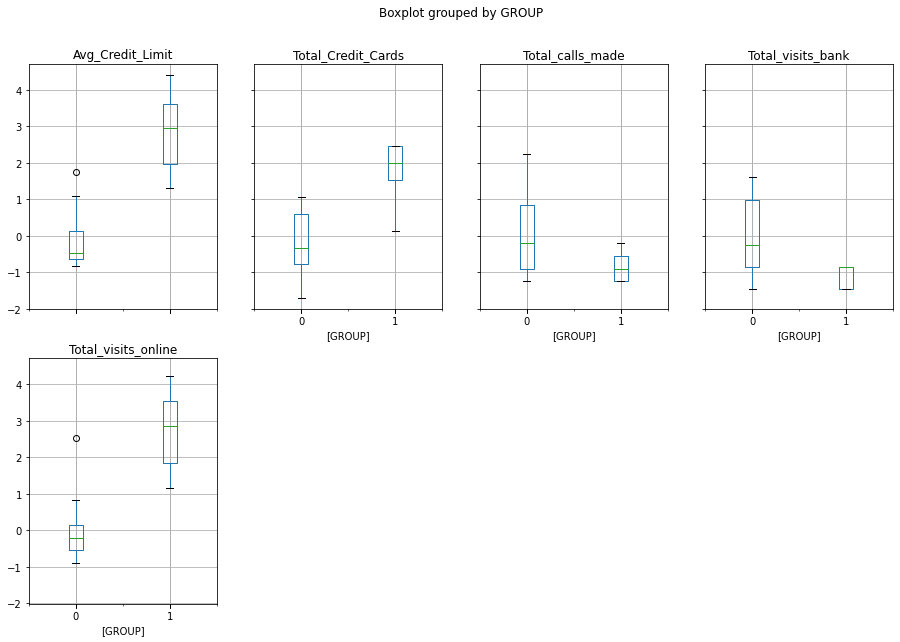

In [153]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [161]:
df5.groupby(by = 'GROUP').min()  # Getting min values to compare clusters and for analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,3000,1,0,0,0
1,84000,5,0,6,0


In [162]:
df5.groupby(by = 'GROUP').max() # Getting max values to compare clusters and for analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,100000,7,5,10,10
1,200000,10,1,15,3


In [163]:
group_0 = df5[df5['GROUP'] == 0].groupby(by =  'GROUP')    # Also various details about the features for cluster = 0
group_0.describe().T

GROUP                                  0
Avg_Credit_Limit    count     610.000000
                    mean    25847.540984
                    std     20723.721022
                    min      3000.000000
                    25%     10000.000000
                    50%     17000.000000
                    75%     39000.000000
                    max    100000.000000
Total_Credit_Cards  count     610.000000
                    mean        4.375410
                    std         1.873254
                    min         1.000000
                    25%         3.000000
                    50%         4.000000
                    75%         6.000000
                    max         7.000000
Total_visits_bank   count     610.000000
                    mean        2.550820
                    std         1.604041
                    min         0.000000
                    25%         1.000000
                    50%         2.000000
                    75%         4.000000
                    max         5.000000
Total_visits_online count     610.000000
                    mean        1.926230
                    std         1.596219
                    min         0.000000
                    25%         1.000000
                    50%         2.000000
                    75%         3.000000
                    max        10.000000
Total_calls_made    count     610.000000
                    mean        3.788525
                    std         2.874987
                    min         0.000000
                    25%         1.000000
                    50%         3.000000
                    75%         6.000000
                    max        10.000000

In [164]:
group_1 = df5[df5['GROUP'] == 1].groupby(by =  'GROUP')    # Also various details about the features for cluster= 1.
group_1.describe().T

GROUP                                  1
Avg_Credit_Limit    count      50.000000
                    mean   141040.000000
                    std     34457.877272
                    min     84000.000000
                    25%    108750.000000
                    50%    145500.000000
                    75%    170000.000000
                    max    200000.000000
Total_Credit_Cards  count      50.000000
                    mean        8.740000
                    std         1.274715
                    min         5.000000
                    25%         8.000000
                    50%         9.000000
                    75%        10.000000
                    max        10.000000
Total_visits_bank   count      50.000000
                    mean        0.600000
                    std         0.494872
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         1.000000
                    max         1.000000
Total_visits_online count      50.000000
                    mean       10.900000
                    std         2.880264
                    min         6.000000
                    25%         8.000000
                    50%        11.000000
                    75%        13.000000
                    max        15.000000
Total_calls_made    count      50.000000
                    mean        1.080000
                    std         0.876915
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         2.000000
                    max         3.000000

In [168]:
for g in 0,1:   # tried getting min, mas for all clusters using for loop
    for c in col:
        min = df5[df5['GROUP'] == g][c].min()
        max = df5[df5['GROUP'] == g][c].max()
        print(f'Group and Column , min and max values are : {g,c,min,max}')
#        print(f'Group and Column , min and max values are : {g,c,df5[df5['GROUP'] == g][c].min(),df5[df5['GROUP'] == g][c].max()}')

Group and Column , min and max values are : (0, 'Avg_Credit_Limit', 3000, 100000)
Group and Column , min and max values are : (0, 'Total_Credit_Cards', 1, 7)
Group and Column , min and max values are : (0, 'Total_visits_bank', 0, 5)
Group and Column , min and max values are : (0, 'Total_visits_online', 0, 10)
Group and Column , min and max values are : (0, 'Total_calls_made', 0, 10)
Group and Column , min and max values are : (1, 'Avg_Credit_Limit', 84000, 200000)
Group and Column , min and max values are : (1, 'Total_Credit_Cards', 5, 10)
Group and Column , min and max values are : (1, 'Total_visits_bank', 0, 1)
Group and Column , min and max values are : (1, 'Total_visits_online', 6, 15)
Group and Column , min and max values are : (1, 'Total_calls_made', 0, 3)


#### Let's try KMeans clusterring with three clusters on data without deleting ouliers as above.

In [172]:
silhouette_score(df_labeled.drop('labels',axis=1),df_labeled['labels'] )   # We got a score of 50 with three clusters which is
# better than the previous 39.

0.5157182558881063

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021636310848>,
      dtype=object)

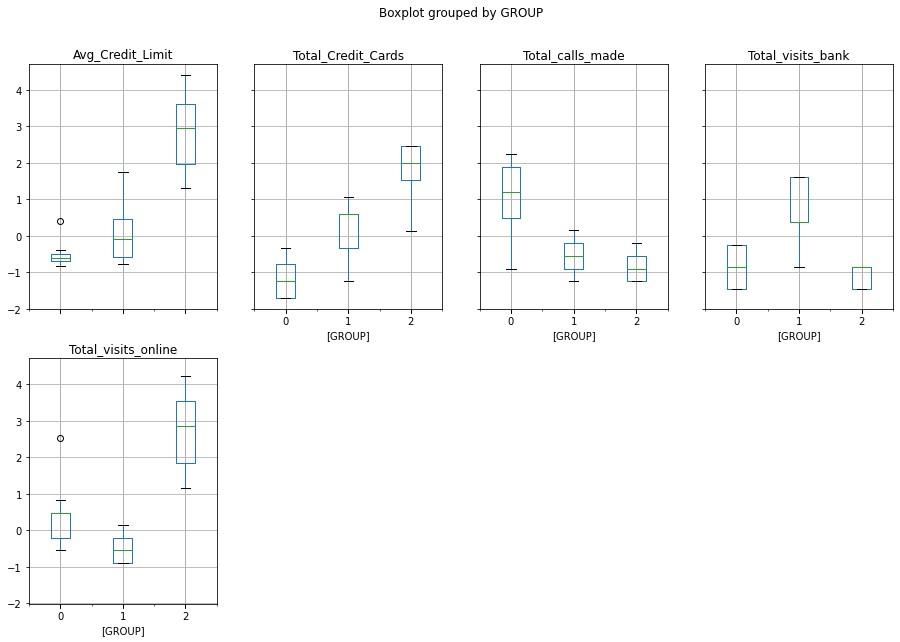

In [173]:
df3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [174]:
df_join = df_labels.join(df_del)

In [175]:
for g in 0,1,2:    # Used for loop to get min max values for all clusters.
    for c in col:
        min = df_join[df_join['labels'] == g][c].min()
        max = df_join[df_join['labels'] == g][c].max()
        print(f'Group and Column , min and max values are : {g,c,min,max}')

Group and Column , min and max values are : (0, 'Avg_Credit_Limit', 3000, 50000)
Group and Column , min and max values are : (0, 'Total_Credit_Cards', 1, 4)
Group and Column , min and max values are : (0, 'Total_visits_bank', 0, 2)
Group and Column , min and max values are : (0, 'Total_visits_online', 1, 10)
Group and Column , min and max values are : (0, 'Total_calls_made', 1, 10)
Group and Column , min and max values are : (1, 'Avg_Credit_Limit', 5000, 100000)
Group and Column , min and max values are : (1, 'Total_Credit_Cards', 2, 7)
Group and Column , min and max values are : (1, 'Total_visits_bank', 1, 5)
Group and Column , min and max values are : (1, 'Total_visits_online', 0, 3)
Group and Column , min and max values are : (1, 'Total_calls_made', 0, 4)
Group and Column , min and max values are : (2, 'Avg_Credit_Limit', 84000, 200000)
Group and Column , min and max values are : (2, 'Total_Credit_Cards', 5, 10)
Group and Column , min and max values are : (2, 'Total_visits_bank', 0,

In [176]:
df_join.groupby(by = 'labels').min()  # Getting min value for all clusters

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,3000,1,0,1,1
1,5000,2,1,0,0
2,84000,5,0,6,0


In [177]:
df_join.groupby(by = 'labels').max()  # Getting max values for all clusters.

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,50000,4,2,10,10
1,100000,7,5,3,4
2,200000,10,1,15,3


In [187]:
kgroup_0 = df_join1[df_join1['labels'] == 0].groupby(by =  'labels')
kgroup_0.describe().T     # Also various details about the features for cluster = 0

labels                                0
Avg_Credit_Limit    count    224.000000
                    mean   12174.107143
                    std     5249.048524
                    min     3000.000000
                    25%     8000.000000
                    50%    12000.000000
                    75%    16000.000000
                    max    50000.000000
Total_Credit_Cards  count    224.000000
                    mean       2.410714
                    std        1.100783
                    min        1.000000
                    25%        1.000000
                    50%        2.000000
                    75%        3.000000
                    max        4.000000
Total_visits_bank   count    224.000000
                    mean       0.933036
                    std        0.803567
                    min        0.000000
                    25%        0.000000
                    50%        1.000000
                    75%        2.000000
                    max        2.000000
Total_visits_online count    224.000000
                    mean       3.553571
                    std        1.218978
                    min        1.000000
                    25%        2.000000
                    50%        4.000000
                    75%        4.000000
                    max       10.000000
Total_calls_made    count    224.000000
                    mean       6.870536
                    std        1.990161
                    min        1.000000
                    25%        5.000000
                    50%        7.000000
                    75%        9.000000
                    max       10.000000

In [188]:
kgroup_1 = df_join1[df_join1['labels'] == 1].groupby(by =  'labels')
kgroup_1.describe().T               # Also various details about the features for cluster = 1

labels                                 1
Avg_Credit_Limit    count     386.000000
                    mean    33782.383420
                    std     22169.460696
                    min      5000.000000
                    25%     13000.000000
                    50%     31000.000000
                    75%     52000.000000
                    max    100000.000000
Total_Credit_Cards  count     386.000000
                    mean        5.515544
                    std         1.140069
                    min         2.000000
                    25%         4.000000
                    50%         6.000000
                    75%         6.000000
                    max         7.000000
Total_visits_bank   count     386.000000
                    mean        3.489637
                    std         1.135563
                    min         1.000000
                    25%         3.000000
                    50%         3.000000
                    75%         5.000000
                    max         5.000000
Total_visits_online count     386.000000
                    mean        0.981865
                    std         0.857167
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         2.000000
                    max         3.000000
Total_calls_made    count     386.000000
                    mean        2.000000
                    std         1.430648
                    min         0.000000
                    25%         1.000000
                    50%         2.000000
                    75%         3.000000
                    max         4.000000

In [189]:
kgroup_2 = df_join1[df_join1['labels'] == 2].groupby(by =  'labels')
kgroup_2.describe().T                  # Also various details about the features for cluster = 2

labels                                 2
Avg_Credit_Limit    count      50.000000
                    mean   141040.000000
                    std     34457.877272
                    min     84000.000000
                    25%    108750.000000
                    50%    145500.000000
                    75%    170000.000000
                    max    200000.000000
Total_Credit_Cards  count      50.000000
                    mean        8.740000
                    std         1.274715
                    min         5.000000
                    25%         8.000000
                    50%         9.000000
                    75%        10.000000
                    max        10.000000
Total_visits_bank   count      50.000000
                    mean        0.600000
                    std         0.494872
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         1.000000
                    max         1.000000
Total_visits_online count      50.000000
                    mean       10.900000
                    std         2.880264
                    min         6.000000
                    25%         8.000000
                    50%        11.000000
                    75%        13.000000
                    max        15.000000
Total_calls_made    count      50.000000
                    mean        1.080000
                    std         0.876915
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         2.000000
                    max         3.000000

### I believe the below two cells are not required as I already said these things above but tough to delete in the last minute.
### If they are redundant please  ignore 

### Cluster comparison between KMeans and Hierachical 

#### Let’s compare Hierarchical Linkage Complete, and KMeans clustering. 

####        Please refer above for diagrams, scores.

#### After analyze their clusters we can conclude as follows.

#### 1.	Even though the number of clusters in them one with 2 sets other with 
####     three sets, the results are very similar.
#### 2.	There are broadly two types of customers. Higher average credit limit 
####     and lower average credit limit.
#### 3.	These guys have a little different usage. 
#### 4.	Higher credit limit guys are using online banking more.
#### 5.	They have more credit cards.
#### 6.	They visit bank less often and calls made were also fewer.
#### 7.	The lower average credit limit guys are coming to the bank more,
####     less credit cards.  Calls made are more and online usage less.

####  The above is true in both clustering algorithms, only difference is KMeans split the data into three clusters Vs hierarchical two clusters.

###   Hierarchical Complete Linkage cluster comparison

In [ ]:
#### ====================================================================
#### Hierarchical Complete Linkage cluster comparison
#### =====================================================================
####  Group        Feature                  Minimum          Maximum
#### =====================================================================
####  0            Avg_Credit_Limit              3000          100000
####  1                                         84000          200000
####  0            Total_Credit_Cards               1               7
####  1                                             5              10
####  0            Total_visits_bank                0               5
####  1                                             0               1
####  0            Total_visits_online              0              10
####  1                                             6              15
####  0            Total_calls_made                 0              10
####  1                                             0               3
####  ====================================================================


####  If you look at the clusters, it looks as follows.

####  1.	For Avg_Credit_Limit, Total_Credit_Cards,  and Total_visits_online the values used by the clusters 
####         are literally like lower range for lower cluster and upper range for upper cluster. They are almost not over lapping.
####  2.	Total_visits_bank, Total_calls_made just reversed. What I mean by that is for Avg_Credit_Limit 
####         lower cluster these are high and for higher cluster these are low.
####  3.	This can also be explained as follows.
####  4.	 People with higher credit limit, more number of credit cards are accessing online banking more and 
####          coming to the bank less and number of calls made are also less.
####  5.	 People with lower credit limit, less number of credit cards are accessing online banking less and 
####          coming to the bank more and number of calls made are also more.
####  6.	The interaction with the call center is more for the second group. So may be they are more unhappy.


##  Recommendations to the bank :

####  1.	Make the online banking more available by making it easier and intuitive. Also available on all devices. Provide some training to the customers. Add more features to it.
####  2.	This way interaction will be less, then customers may be more happy.
####  3.	Also do a random survey on a selected few lower and upper cluster (credit limit) guys and find out if coming to the bank, interacting with help desk (calls) or online banking is the issue and 
####            fix the issue. I doubt the last one is an issue but it may help us to get more insight so that what new features they want in online banking.
####  4.	We should look at the lower cluster customers and market more credit cards and based on their Credit worthiness update their credit limit.
####  5.	We should look at the upper credit limit guys to see if we can offer some higher rate CDs, low interest loans etc.


##   KMeans clustering comparison 

In [ ]:
#### ====================================================================
#### KMeans clustering comparison
#### =====================================================================
####  Group        Feature                  Minimum          Maximum
#### =====================================================================
####  0            Avg_Credit_Limit              3000           50000
####  1                                          5000          100000
####  2                                         84000          200000
####  0            Total_Credit_Cards               1               4
####  1                                             2               7
####  2                                             5              10
####  0            Total_visits_bank                0               2
####  1                                             1               5
####  2                                             0               1
####  0            Total_visits_online              1              10
####  1                                             0               3
####  2                                             6              15
####  0            Total_calls_made                 1              10
####  1                                             0               4
####  2                                             0               3
#### =====================================================================

#### Even though it got three clusters the results are very similar to hierarchical clustering results.
#### We can apply the same results …
#### If you look at the clusters, it looks as follows.

#### 1	For Avg_Credit_Limit, Total_Credit_Cards,  and Total_visits_online the values used by the clusters 
####     are literally like lower range for lower clusters and upper range for upper cluster. Here they are 
####     overlapping little bit.
#### 2	Total_visits_bank, Total_calls_made just reversed to some extent but not fully as hierarchical.
#### 3	This can also be explained as follows.
#### 4	People with higher credit limit, more number of credit cards are accessing online banking more and 
####      coming to the bank less and number of calls made are also less.
#### 5	 People with lower credit limit, less number of credit cards are accessing online banking less and 
####      coming to the bank more and number of calls made are also more.
#### 6	The interaction with the call center is more for the second group. So may be they are more unhappy.

##  Recommendations to the bank :

####  1.	Make the online banking more available by making it easier and intuitive. Also available on all devices. Provide some training to the customers. Add more features to it.
####  2.	This way interaction will be less, then customers may be more happy.
####  3.	Also do a random survey on a selected few lower and upper cluster (credit limit) guys and find out if coming to the bank, interacting with help desk (calls) or online banking is the issue and 
####            fix the issue. I doubt the last one is an issue but it may help us to get more insight so that we can add new features they want in online banking. 
####  4.	We should look at the lower cluster customers and market more credit cards and based on their credit worthiness update their credit limit.
####  5.	We should look at the upper credit limit guys to see if we can offer some higher rate CDs, low interest loans etc.
